# Fourier Transform
Converts a spatial image to frequeny domain image


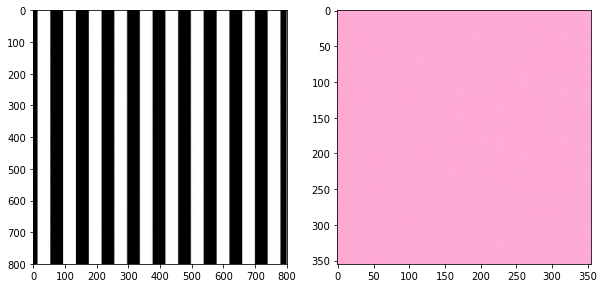

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# read the images
image_stripes = cv2.imread(r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_2_Convolutional_Filters_Edge_Detection\images\stripes.jpg')
# change color from bgr to rgb
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# read another image
image_solid = cv2.imread(r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_2_Convolutional_Filters_Edge_Detection\images\pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.imshow(image_stripes)
ax2.imshow(image_solid)

convert to gray scale to focus on intensity pattern in the image

In [3]:
gray_stripes = cv2.cvtColor(image_stripes,cv2.COLOR_RGB2GRAY) 
gray_solids = cv2.cvtColor(image_solid,cv2.COLOR_RGB2GRAY)

# normalize color from 0 to 255 to 0 to 1
norm_stripes = gray_stripes/ 255
norm_solids = gray_solids/255

# perform a fft and create a scaled, frequency transform image
def ft_image(norm_image):
    '''
    This image takes a normalized, gray scale image and returns a frequency spectrum image 
    :param norm_image: 
    :return: 
    '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f) # shifts the zero frequency to the center of the image, not sure if opencv does it by itself
    frequency_tx = 20*np.log(np.abs(fshift))
    return frequency_tx

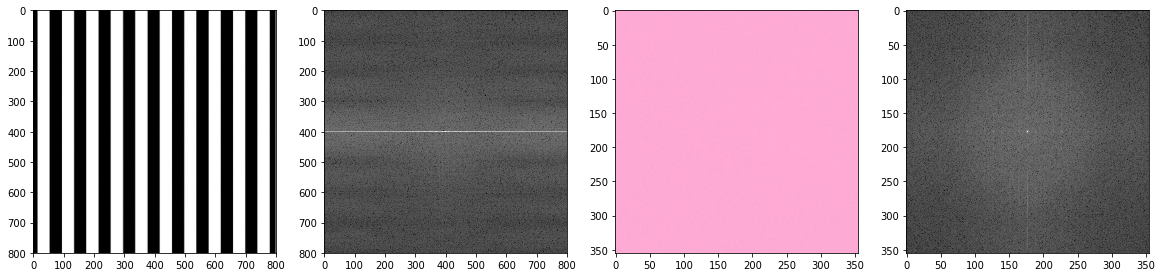

In [6]:
# calll the function on the norm images
ft_stripes = ft_image(norm_stripes)
ft_solids = ft_image(norm_solids)

f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,10))
ax1.imshow(image_stripes)
ax2.imshow(ft_stripes, cmap = 'gray')
ax3.imshow(image_solid)
ax4.imshow(ft_solids, cmap = 'gray')


Low frequency are in the center of the images,
1. The solid image has a center bright spo, showing the low frequency 
2. For stripes, the black color are the high frquency and the white are the low frequency


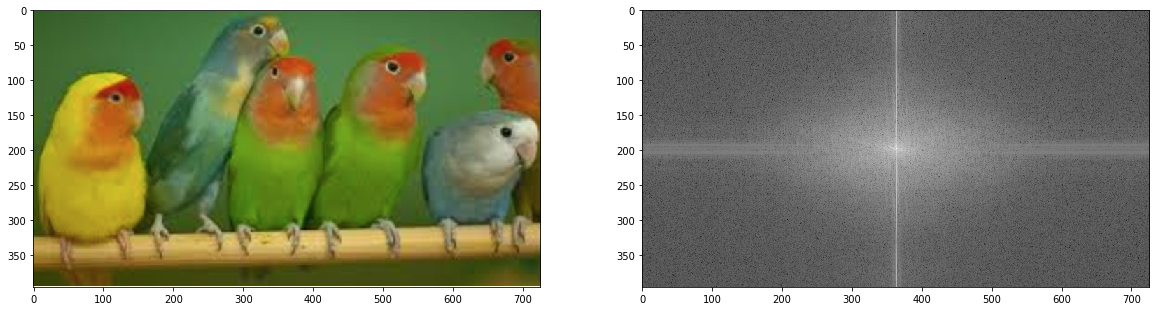

In [7]:
# Read in an image
image = cv2.imread(r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_2_Convolutional_Filters_Edge_Detection\images\birds.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(f_image, cmap='gray')
